## 134 - Buoys and Tropical Storm Cristobal

[Youtube](https://www.youtube.com/watch?v=z0qjMlUXwos)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
from siphon.simplewebservice.ndbc import NDBC

In [2]:
df = NDBC.latest_observations()
df.head()

,station,latitude,longitude,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,3hr_pressure_tendency,air_temperature,water_temperature,dewpoint,visibility,water_level_above_mean,time
0,13001,12.0,-23.0,33.0,8.1,9.7,NaN,NaN,NaN,NaN,1012.8,NaN,26.7,27.1,NaN,NaN,NaN,2022-12-19 13:00:00+00:00
1,13002,21.0,-23.0,55.0,6.5,8.2,NaN,NaN,NaN,NaN,NaN,NaN,23.9,24.4,NaN,NaN,NaN,2022-12-19 13:00:00+00:00
2,13008,15.0,-38.0,69.0,6.8,8.1,NaN,NaN,NaN,NaN,1017.3,NaN,25.7,25.9,NaN,NaN,NaN,2022-12-19 13:00:00+00:00
3,14043,-12.0,67.0,110.0,6.3,8.0,NaN,NaN,NaN,NaN,1006.8,NaN,27.6,NaN,NaN,NaN,NaN,2022-12-19 13:00:00+00:00
4,15001,-10.0,-10.0,143.0,6.0,7.0,NaN,NaN,NaN,NaN,1013.5,NaN,23.9,NaN,NaN,NaN,NaN,2022-12-19 13:00:00+00:00


In [3]:
proj = ccrs.LambertConformal(central_latitude = 45, central_longitude = -100, standard_parallels = [30, 60])


/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256

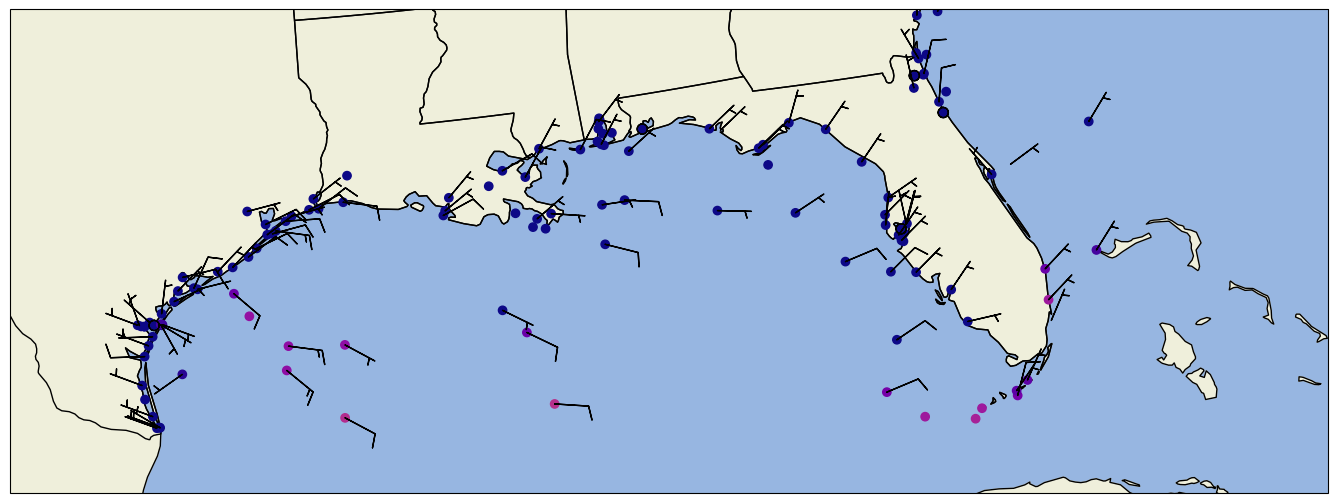

In [4]:
fig = plt.figure(figsize = (17, 11))
ax = plt.axes(projection = proj)
ax.coastlines('50m', edgecolor = 'black')
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.set_extent([-100, -75, 25, 30], ccrs.PlateCarree())

ax.scatter(df['longitude'], df['latitude'], c = df['air_temperature'], transform = ccrs.PlateCarree(), vmin = 20, vmax = 30, cmap = 'plasma')

df['u-wind'], df['v-wind'] = mpcalc.wind_components(df['wind_speed'].values * units('m/s'), df['wind_direction'].values * units('degrees'))

ax.barbs(df['longitude'].values, df['latitude'].values, df['u-wind'].values, df['v-wind'].values, transform = ccrs.PlateCarree())